In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Data Understanding

In [3]:
# Uploading files

boston_calendar = pd.read_csv('calendar.csv')
boston_listings = pd.read_csv('listings.csv')
boston_reviews = pd.read_csv('reviews.csv')

In [4]:
boston_calendar

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [5]:
boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [6]:
# Converting listing_id to string

boston_calendar['listing_id'] = boston_calendar['listing_id'].astype('str')

In [7]:
# Converting to date

boston_calendar['date'] = pd.to_datetime(boston_calendar['date'])

In [8]:
# Number of unique houses

len(boston_calendar.listing_id.unique())

3585

In [9]:
boston_calendar.listing_id.value_counts()

12898806    730
14668441    365
13928400    365
5163162     365
12709469    365
           ... 
4069422     365
10634364    365
6268082     365
2754975     365
13667826    365
Name: listing_id, Length: 3585, dtype: int64

In [10]:
boston_calendar.date.value_counts()

2016-12-27    3586
2017-05-06    3586
2016-12-15    3586
2016-09-09    3586
2016-11-07    3586
              ... 
2016-11-08    3586
2017-05-16    3586
2017-03-06    3586
2017-02-15    3586
2017-03-03    3586
Name: date, Length: 365, dtype: int64

In [11]:
# First and last date

print(boston_calendar.date.min())
print(boston_calendar.date.max())

2016-09-06 00:00:00
2017-09-05 00:00:00


In [12]:
# % of available and not available houses

boston_calendar.available.value_counts(normalize=True)

f    0.508716
t    0.491284
Name: available, dtype: float64

In [13]:
boston_calendar.price.value_counts()

$150.00      20752
$65.00       17518
$75.00       16249
$100.00      15499
$200.00      14326
             ...  
$1,085.00        1
$1,911.00        1
$986.00          1
$1,330.00        1
$1,776.00        1
Name: price, Length: 1246, dtype: int64

# Houses listings

In [14]:
boston_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,9.0,f,NaN,NaN,t,strict,f,f,8,0.34
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,7.0,f,NaN,NaN,f,strict,f,f,1,2.00


In [15]:
boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [16]:
# Converting id to string

boston_listings['id'] = boston_listings['id'].astype('str')

In [17]:
boston_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [18]:
# Visualizng the review score columns

boston_listings[['number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','calculated_host_listings_count',
       'reviews_per_month']]

,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.30
2,41,2009-07-19,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,1,0.47
3,1,2016-08-28,2016-08-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.00
4,29,2015-08-18,2016-09-01,99.0,10.0,10.0,10.0,10.0,9.0,10.0,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...
3580,4,2015-09-18,2016-08-27,90.0,10.0,10.0,10.0,10.0,8.0,9.0,8,0.34
3581,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
3582,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3583,2,2016-08-27,2016-09-04,90.0,9.0,8.0,9.0,9.0,8.0,7.0,1,2.00


In [19]:
# Average of each score

print('review_scores_accuracy -', boston_listings.review_scores_accuracy.mean())
print('review_scores_cleanliness -', boston_listings.review_scores_cleanliness.mean())
print('review_scores_checkin -', boston_listings.review_scores_checkin.mean())
print('review_scores_communication -', boston_listings.review_scores_communication.mean())
print('review_scores_location -', boston_listings.review_scores_location.mean())
print('review_scores_value -', boston_listings.review_scores_value.mean())

review_scores_accuracy - 9.43157132512672
review_scores_cleanliness - 9.25804119985544
review_scores_checkin - 9.64629294755877
review_scores_communication - 9.646548608601373
review_scores_location - 9.414042707202317
review_scores_value - 9.16823444283647


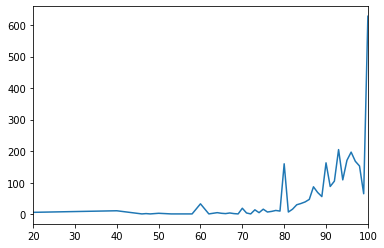

In [20]:
# Visualizing the review score columns

boston_listings['review_scores_rating'].value_counts().sort_index().plot()

In [21]:
# Visualizing the adress columns

boston_listings[['city', 'state', 'neighbourhood','zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude']]

,city,state,neighbourhood,zipcode,market,smart_location,country_code,country,latitude,longitude
0,Boston,MA,Roslindale,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068
1,Boston,MA,Roslindale,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374
2,Boston,MA,Roslindale,02131,Boston,"Boston, MA",US,United States,42.292438,-71.135765
3,Boston,MA,NaN,NaN,Boston,"Boston, MA",US,United States,42.281106,-71.121021
4,Boston,MA,Roslindale,02131,Boston,"Boston, MA",US,United States,42.284512,-71.136258
...,...,...,...,...,...,...,...,...,...,...
3580,Somerville,MA,Somerville,02143,Boston,"Somerville, MA",US,United States,42.380968,-71.083795
3581,Brookline,MA,NaN,02446,Boston,"Brookline, MA",US,United States,42.347503,-71.118336
3582,Cambridge,MA,NaN,02141,Boston,"Cambridge, MA",US,United States,42.371771,-71.071300
3583,Somerville,MA,Somerville,02145,Boston,"Somerville, MA",US,United States,42.385226,-71.080923


In [22]:
# Number of houses per neighbourhood

boston_listings.neighbourhood.value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Somerville             13
Financial District     13
Downtown                8
Leather District        8
Brookline               8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

# Reviews

In [23]:
boston_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


In [24]:
boston_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [25]:
len(boston_reviews.listing_id.unique())

2829

In [26]:
boston_reviews['date'] = pd.to_datetime(boston_reviews['date'])

In [27]:
print(boston_reviews['date'].min())
print(boston_reviews['date'].max())

2009-03-21 00:00:00
2016-09-06 00:00:00


# Business Understanding

# 1. Who we did in this period? (Revenue and review rating)

# Revenue in this period

In [28]:
boston_calendar

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [29]:
boston_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null object
date          1308890 non-null datetime64[ns]
available     1308890 non-null object
price         643037 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 39.9+ MB


In [32]:
# Cleaning and converting price column to float

boston_calendar['price'] = boston_calendar['price'].str.replace('$','')
boston_calendar['price'] = boston_calendar['price'].str.replace(',','')
boston_calendar['price'] = boston_calendar['price'].astype('float')

In [33]:
# Total revenue

boston_calendar[boston_calendar['available'] == 't'].price.sum()

127603561.0

In [34]:
boston_calendar[boston_calendar['available'] == 'f'].price.sum()

0.0

In [35]:
boston_calendar['price'].sum()

127603561.0

In [36]:
boston_calendar.set_index('date', inplace=True)

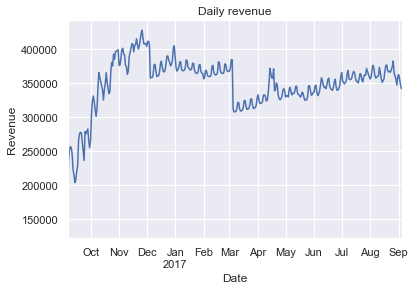

In [37]:
sns.set(style="darkgrid")

boston_calendar.groupby(by='date').price.sum().plot()
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.title('Daily revenue')
plt.show()

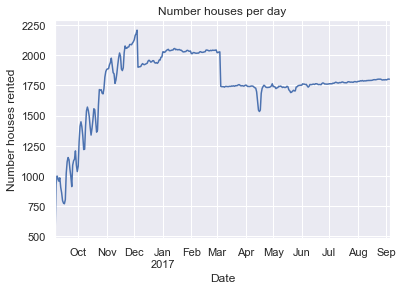

In [38]:
boston_calendar.groupby(by='date').price.count().plot()
plt.ylabel('Number houses rented')
plt.xlabel('Date')
plt.title('Number houses per day')
plt.show()

In [39]:
boston_calendar.loc['2017-02-02']

,listing_id,available,price
date,,,
2017-02-02,12147973,f,NaN
2017-02-02,3075044,t,65.0
2017-02-02,6976,t,65.0
2017-02-02,1436513,f,NaN
2017-02-02,7651065,t,79.0
...,...,...,...
2017-02-02,8373729,t,69.0
2017-02-02,14844274,t,150.0
2017-02-02,14585486,f,NaN


In [40]:
boston_calendar.loc['2017-02-02'].available.value_counts()

t    2012
f    1574
Name: available, dtype: int64

In [41]:
boston_calendar.loc['2017-02-02'].price.count()

2012

In [42]:
boston_calendar.groupby(by='date').agg({'listing_id':'nunique'})

,listing_id
date,
2016-09-06,3585
2016-09-07,3585
2016-09-08,3585
2016-09-09,3585
2016-09-10,3585
...,...
2017-09-01,3585
2017-09-02,3585
2017-09-03,3585


In [43]:
len(boston_calendar.listing_id.unique())

3585

In [44]:
boston_calendar.shape[0]/len(boston_calendar.listing_id.unique())

365.1018131101813

In [45]:
boston_calendar.loc['2016-09-06']

,listing_id,available,price
date,,,
2016-09-06,12147973,f,NaN
2016-09-06,3075044,f,NaN
2016-09-06,6976,f,NaN
2016-09-06,1436513,f,NaN
2016-09-06,7651065,f,NaN
...,...,...,...
2016-09-06,8373729,t,59.0
2016-09-06,14844274,f,NaN
2016-09-06,14585486,f,NaN


In [46]:
boston_calendar.loc['2016-09-06'].price.count()

570

In [47]:
len(boston_calendar.loc['2016-09-06'].listing_id.unique())

3585

In [48]:
boston_calendar.price.sum()/boston_calendar.price.count()

198.43890942511862

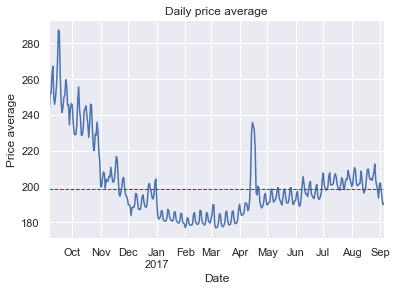

In [49]:
(boston_calendar.groupby(by='date').price.sum()/boston_calendar.groupby(by='date').price.count()).plot()
plt.axhline((boston_calendar.price.sum()/boston_calendar.price.count()), color='red', linestyle='dashed', linewidth=1, label='Média')
plt.ylabel('Price average')
plt.xlabel('Date')
plt.title('Daily price average')
plt.show()

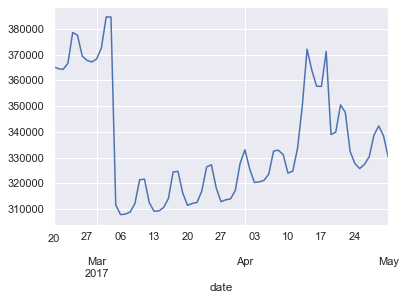

In [50]:
# Zooming on March and April to see the revenue fall happens

boston_calendar.loc['2017-02-20':'2017-05-01'].groupby(by='date').price.sum().plot()

In [51]:
boston_calendar.reset_index(inplace=True)

# Rating in this period

In [52]:
# Average review_scores_rating

boston_listings.review_scores_rating.mean()

91.91666666666667

[Text(0.5, 1.0, 'Review rating distribution')]

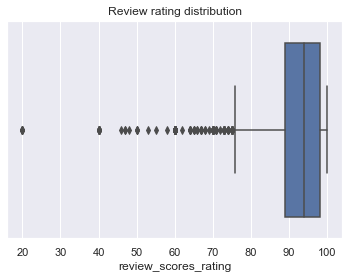

In [53]:
ax = sns.boxplot(boston_listings.review_scores_rating)
ax.set(title='Review rating distribution')

In [54]:
# % of houses with less then 90 in their review_scores_rating

boston_listings[boston_listings.review_scores_rating < 90].shape[0]/boston_listings[boston_listings.review_scores_rating.notnull()].shape[0]

0.2597402597402597

In [55]:
# Merging boston_calendar and  boston_listings

boston_df = pd.merge(boston_calendar, boston_listings[['id', 'review_scores_rating', 'neighbourhood','latitude', 'longitude']], left_on=['listing_id'], right_on=['id'], how='inner')
boston_df

,date,listing_id,available,price,id,review_scores_rating,neighbourhood,latitude,longitude
0,2017-09-05,12147973,f,NaN,12147973,NaN,Roslindale,42.282619,-71.133068
1,2017-09-04,12147973,f,NaN,12147973,NaN,Roslindale,42.282619,-71.133068
2,2017-09-03,12147973,f,NaN,12147973,NaN,Roslindale,42.282619,-71.133068
3,2017-09-02,12147973,f,NaN,12147973,NaN,Roslindale,42.282619,-71.133068
4,2017-09-01,12147973,f,NaN,12147973,NaN,Roslindale,42.282619,-71.133068
...,...,...,...,...,...,...,...,...,...
1308885,2016-09-10,14504422,f,NaN,14504422,NaN,Somerville,42.387888,-71.080654
1308886,2016-09-09,14504422,f,NaN,14504422,NaN,Somerville,42.387888,-71.080654
1308887,2016-09-08,14504422,f,NaN,14504422,NaN,Somerville,42.387888,-71.080654
1308888,2016-09-07,14504422,f,NaN,14504422,NaN,Somerville,42.387888,-71.080654


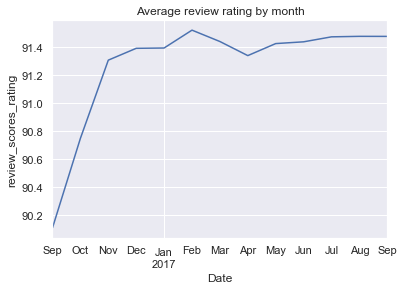

In [56]:
boston_df[boston_df.available == 't'].groupby(pd.Grouper(key='date', freq='M')).review_scores_rating.mean().plot()
plt.ylabel('review_scores_rating')
plt.xlabel('Date')
plt.title('Average review rating by month')
plt.show()

# Revenue per neighbourhood

In [57]:
boston_df

,date,listing_id,available,price,id,review_scores_rating,neighbourhood,latitude,longitude
0,2017-09-05,12147973,f,NaN,12147973,NaN,Roslindale,42.282619,-71.133068
1,2017-09-04,12147973,f,NaN,12147973,NaN,Roslindale,42.282619,-71.133068
2,2017-09-03,12147973,f,NaN,12147973,NaN,Roslindale,42.282619,-71.133068
3,2017-09-02,12147973,f,NaN,12147973,NaN,Roslindale,42.282619,-71.133068
4,2017-09-01,12147973,f,NaN,12147973,NaN,Roslindale,42.282619,-71.133068
...,...,...,...,...,...,...,...,...,...
1308885,2016-09-10,14504422,f,NaN,14504422,NaN,Somerville,42.387888,-71.080654
1308886,2016-09-09,14504422,f,NaN,14504422,NaN,Somerville,42.387888,-71.080654
1308887,2016-09-08,14504422,f,NaN,14504422,NaN,Somerville,42.387888,-71.080654
1308888,2016-09-07,14504422,f,NaN,14504422,NaN,Somerville,42.387888,-71.080654


In [58]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308890 entries, 0 to 1308889
Data columns (total 9 columns):
date                    1308890 non-null datetime64[ns]
listing_id              1308890 non-null object
available               1308890 non-null object
price                   643037 non-null float64
id                      1308890 non-null object
review_scores_rating    1011780 non-null float64
neighbourhood           1110695 non-null object
latitude                1308890 non-null float64
longitude               1308890 non-null float64
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 99.9+ MB


In [59]:
#boston_df['zipcode'] = boston_df['zipcode'].replace('02108 02111','02108')
#boston_df['zipcode'] = boston_df['zipcode'].replace('02134-1704','02134')

In [60]:
boston_df.groupby(by='neighbourhood').price.sum().sort_values(ascending=False).sum()

110274318.0

In [61]:
# Total revenue per neighbourhood

boston_df.groupby(by='neighbourhood').price.sum().sort_values(ascending=False)

neighbourhood
Back Bay              15980742.0
South End             12001605.0
Fenway/Kenmore        11103086.0
South Boston           9422084.0
Jamaica Plain          8825814.0
Allston-Brighton       6873009.0
Beacon Hill            6861439.0
West End               5180947.0
Chinatown              5061797.0
North End              4774788.0
Dorchester             4255765.0
Roxbury                4047036.0
East Boston            3419012.0
Charlestown            2926746.0
Mission Hill           2245832.0
Theater District       1198148.0
Roslindale             1171150.0
Downtown Crossing      1096491.0
West Roxbury            898922.0
Leather District        464641.0
Mattapan                411917.0
Cambridge               374608.0
Hyde Park               308629.0
Financial District      303448.0
Somerville              287818.0
Government Center       282859.0
Downtown                248783.0
Brookline               114254.0
Chestnut Hill            83364.0
Harvard Square           4958

In [62]:
# Total of daily payments

boston_df.groupby(by='neighbourhood').price.count().sort_values(ascending=False).sum()

533712

In [63]:
#Number of daily payments per neighbourhood

boston_df.groupby(by='neighbourhood').price.count().sort_index()

neighbourhood
Allston-Brighton      50556
Back Bay              55869
Beacon Hill           28101
Brookline               954
Cambridge              1758
Charlestown           13300
Chestnut Hill          1055
Chinatown             14801
Dorchester            43638
Downtown               1641
Downtown Crossing      3314
East Boston           23150
Fenway/Kenmore        36190
Financial District      687
Government Center       863
Harvard Square           86
Hyde Park              4201
Jamaica Plain         55599
Leather District       1633
Mattapan               5077
Mission Hill          13085
North End             20779
Roslindale            12227
Roxbury               24700
Somerville             3137
South Boston          37561
South End             50476
Theater District       5972
West End              16168
West Roxbury           7134
Name: price, dtype: int64

In [64]:
# Average daily price

boston_df.groupby(by='neighbourhood').price.mean().sort_values(ascending=False)

neighbourhood
Harvard Square        576.558140
Financial District    441.700146
Chinatown             341.990203
Downtown Crossing     330.866325
Government Center     327.762457
West End              320.444520
Fenway/Kenmore        306.799834
Back Bay              286.039521
Leather District      284.532149
South Boston          250.847528
Beacon Hill           244.170634
South End             237.768543
North End             229.789114
Charlestown           220.056090
Cambridge             213.087600
Theater District      200.627595
Mission Hill          171.634085
Roxbury               163.847611
Jamaica Plain         158.740517
Downtown              151.604509
East Boston           147.689503
Allston-Brighton      135.948433
West Roxbury          126.005327
Brookline             119.763103
Dorchester             97.524291
Roslindale             95.783921
Somerville             91.749442
Mattapan               81.133937
Chestnut Hill          79.018009
Hyde Park              73.465

In [65]:
# Average review_scores_rating

boston_df.groupby(by='neighbourhood').review_scores_rating.mean().sort_values(ascending=False)

neighbourhood
Brookline             100.000000
Leather District       98.400000
Financial District     98.250000
West Roxbury           96.407407
Roslindale             95.565217
Jamaica Plain          94.427509
South Boston           94.365169
Charlestown            94.147541
North End              93.962617
Beacon Hill            93.811688
Hyde Park              93.611111
South End              93.145161
Chinatown              92.377778
West End               92.054054
Government Center      92.000000
Back Bay               91.531818
Downtown Crossing      91.380952
Roxbury                90.833333
Allston-Brighton       90.067164
Chestnut Hill          90.000000
East Boston            89.745283
Dorchester             89.579882
Theater District       89.363636
Fenway/Kenmore         89.349693
Somerville             88.571429
Mattapan               88.500000
Mission Hill           87.550725
Downtown               83.285714
Cambridge              74.500000
Harvard Square               

# 2. Where are the houses?

In [66]:
!pip install folium

In [67]:
import folium
from folium.plugins import HeatMap

In [68]:
print(boston_df.latitude.max())
print(boston_df.longitude.max())

42.38998167884297
-71.00009991969033


In [69]:
m = folium.Map(location=[boston_df.latitude.mean(), boston_df.longitude.mean()])

In [70]:
# Vizualizing the distribuition

HeatMap(data=boston_listings[['latitude', 'longitude', 'price']].groupby(['latitude', 'longitude']).count().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m)


display(m)

In [113]:
boston_listings.neighbourhood.value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Somerville             13
Financial District     13
Downtown                8
Leather District        8
Brookline               8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

# 3. Which are the best neighbourhoods?

In [69]:
df_sactter_plot = pd.merge(pd.merge(boston_df.groupby(by='neighbourhood').price.mean().sort_index(),
         boston_df.groupby(by='neighbourhood').review_scores_rating.mean().sort_index(),
         on='neighbourhood'),
         boston_df.groupby(by='neighbourhood').price.count().sort_index(),
         on='neighbourhood')

df_sactter_plot

,price_x,review_scores_rating,price_y
neighbourhood,,,
Allston-Brighton,135.948433,90.067164,50556
Back Bay,286.039521,91.531818,55869
Beacon Hill,244.170634,93.811688,28101
Brookline,119.763103,100.000000,954
Cambridge,213.087600,74.500000,1758
Charlestown,220.056090,94.147541,13300
Chestnut Hill,79.018009,90.000000,1055
Chinatown,341.990203,92.377778,14801
Dorchester,97.524291,89.579882,43638


In [70]:
df_sactter_plot.columns = ['average_price', 'rating_review', 'n_payments']
df_sactter_plot

,average_price,rating_review,n_payments
neighbourhood,,,
Allston-Brighton,135.948433,90.067164,50556
Back Bay,286.039521,91.531818,55869
Beacon Hill,244.170634,93.811688,28101
Brookline,119.763103,100.000000,954
Cambridge,213.087600,74.500000,1758
Charlestown,220.056090,94.147541,13300
Chestnut Hill,79.018009,90.000000,1055
Chinatown,341.990203,92.377778,14801
Dorchester,97.524291,89.579882,43638


In [71]:
df_sactter_plot.sort_values(by='n_payments', inplace=True, ascending=False)
df_sactter_plot.reset_index(inplace=True)
df_sactter_plot

,neighbourhood,average_price,rating_review,n_payments
0,Back Bay,286.039521,91.531818,55869
1,Jamaica Plain,158.740517,94.427509,55599
2,Allston-Brighton,135.948433,90.067164,50556
3,South End,237.768543,93.145161,50476
4,Dorchester,97.524291,89.579882,43638
5,South Boston,250.847528,94.365169,37561
6,Fenway/Kenmore,306.799834,89.349693,36190
7,Beacon Hill,244.170634,93.811688,28101
8,Roxbury,163.847611,90.833333,24700
9,East Boston,147.689503,89.745283,23150


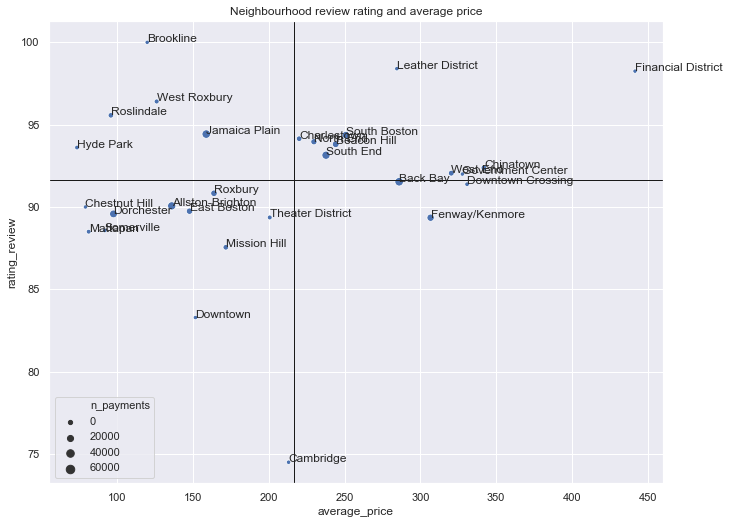

In [72]:
fig, ax = plt.subplots(figsize=(11, 8.5))
sns.scatterplot(x='average_price', y='rating_review',size='n_payments', data=df_sactter_plot)
ax.axhline(df_sactter_plot.rating_review.mean(), color='k', linewidth=1)
ax.axvline(df_sactter_plot.average_price.mean(), color='k', linewidth=1)
plt.title('Neighbourhood review rating and average price')
for i, txt in enumerate(df_sactter_plot.neighbourhood):
    ax.annotate(txt, (df_sactter_plot.average_price[i], df_sactter_plot.rating_review[i]))

In [74]:
df_sactter_plot.sort_values(by='n_payments', ascending=False)

,neighbourhood,average_price,rating_review,n_payments
0,Back Bay,286.039521,91.531818,55869
1,Jamaica Plain,158.740517,94.427509,55599
2,Allston-Brighton,135.948433,90.067164,50556
3,South End,237.768543,93.145161,50476
4,Dorchester,97.524291,89.579882,43638
5,South Boston,250.847528,94.365169,37561
6,Fenway/Kenmore,306.799834,89.349693,36190
7,Beacon Hill,244.170634,93.811688,28101
8,Roxbury,163.847611,90.833333,24700
9,East Boston,147.689503,89.745283,23150


In [250]:
# Correlation beetween average_price and rating_review

df_x['average_price'].corr(df_x['rating_review'])

0.1777772007548773

# Data Modeling

# Extra: Most important features

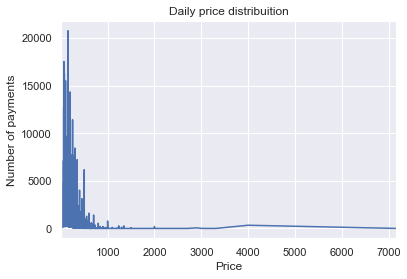

In [78]:
# Visualizing the review score columns

boston_calendar['price'].value_counts().sort_index().plot()
plt.ylabel('Number of payments')
plt.xlabel('Price')
plt.title('Daily price distribuition')
plt.show()

In [81]:
boston_avg_daily = boston_calendar.groupby(by='listing_id').price.mean().to_frame().reset_index()
boston_avg_daily

,listing_id,price
0,10004575,326.666667
1,10009367,NaN
2,10021398,70.000000
3,10032327,222.933333
4,10033322,309.072626
...,...,...
3580,9992751,430.262570
3581,9993602,315.983240
3582,9993826,315.983240
3583,9998187,99.000000


In [82]:
boston_avg_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 2 columns):
listing_id    3585 non-null object
price         2906 non-null float64
dtypes: float64(1), object(1)
memory usage: 56.1+ KB


In [101]:
boston_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [166]:
boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 45 columns):
id                                  3585 non-null object
host_response_time                  3114 non-null object
host_is_superhost                   3585 non-null object
host_total_listings_count           3585 non-null int64
host_has_profile_pic                3585 non-null object
host_identity_verified              3585 non-null object
neighbourhood_cleansed              3585 non-null object
city                                3583 non-null object
zipcode                             3547 non-null object
market                              3571 non-null object
smart_location                      3585 non-null object
country_code                        3585 non-null object
country                             3585 non-null object
is_location_exact                   3585 non-null object
property_type                       3582 non-null object
room_type                           358

In [168]:
# Cleaning and converting price column to float

boston_listings['price'] = boston_listings['price'].str.replace('$','')
boston_listings['price'] = boston_listings['price'].str.replace(',','')
boston_listings['price'] = boston_listings['price'].astype('float')

In [114]:
boston_listings['price']

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

In [150]:
boston_houses_model = boston_listings[['neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'guests_included','host_response_time', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified','price']]

In [151]:
boston_houses_model

,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,host_response_time,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,price
0,Roslindale,02131,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,1,NaN,f,1,t,f,250.0
1,Roslindale,02131,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,0,within an hour,f,1,t,t,65.0
2,Roslindale,02131,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,within a few hours,t,1,t,t,65.0
3,Roslindale,NaN,House,Private room,4,1.0,1.0,2.0,Real Bed,2,within a few hours,f,1,t,f,75.0
4,Roslindale,02131,House,Private room,2,1.5,1.0,2.0,Real Bed,1,within an hour,t,1,t,t,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,Charlestown,02143,Apartment,Private room,3,1.0,1.0,1.0,Real Bed,1,within an hour,f,28,t,t,69.0
3581,Allston,02446,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,a few days or more,f,2,t,t,150.0
3582,Charlestown,02141,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,1,within a day,f,1,t,f,198.0
3583,Charlestown,02145,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,within an hour,f,4,t,t,65.0


In [152]:
boston_houses_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 16 columns):
neighbourhood_cleansed       3585 non-null object
zipcode                      3547 non-null object
property_type                3582 non-null object
room_type                    3585 non-null object
accommodates                 3585 non-null int64
bathrooms                    3571 non-null float64
bedrooms                     3575 non-null float64
beds                         3576 non-null float64
bed_type                     3585 non-null object
guests_included              3585 non-null int64
host_response_time           3114 non-null object
host_is_superhost            3585 non-null object
host_total_listings_count    3585 non-null int64
host_has_profile_pic         3585 non-null object
host_identity_verified       3585 non-null object
price                        3585 non-null float64
dtypes: float64(4), int64(3), object(9)
memory usage: 448.2+ KB


In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [154]:
def clean_fit_linear_mod(df,test_size=.3, rand_state=42):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['price'], axis=0)
    
    y = df['price']
    
    df = df.drop(['price'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    
    df_x = df.drop(columns=cat_vars)
    
    df_y = pd.get_dummies(df[cat_vars], prefix=cat_vars, drop_first=True)
    
    df_func = pd.concat([df_x, df_y], axis=1)
    #for var in  cat_vars:
        # for each cat add dummy var, drop original column
        #df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df_func
    
    # Create training and test sets of data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=rand_state)
    
    # Instantiate a LinearRegression model with normalized data
    modelo_lr = LinearRegression(normalize=True)
    
    # Fit your model to the training data
    modelo_lr.fit(X_train, y_train)
    
    # Predict the response for the training data and the test data
    test_pred = modelo_lr.predict(X_test)
    train_pred = modelo_lr.predict(X_train)
    
    test_score = r2_score(y_test, test_pred)
    train_score = r2_score(y_train, train_pred)

    return test_score, train_score, modelo_lr, X_train, X_test, y_train, y_test

In [160]:
#Use the function to create X and y

test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(boston_houses_model)

In [161]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.424388998207779.  The rsquared on the test data was -9.760449309474048e+16.


In [162]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [163]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A view of the most important features
coef_df.head(20)

,est_int,coefs,abs_coefs
71,zipcode_02472,-1.020886e+15,1.020886e+15
74,property_type_Camper/RV,1.020886e+15,1.020886e+15
61,zipcode_02145,-1.224916e+12,1.224916e+12
10,neighbourhood_cleansed_Charlestown,1.224916e+12,1.224916e+12
60,zipcode_02143,-1.224916e+12,1.224916e+12
48,zipcode_02129,-1.224916e+12,1.224916e+12
64,zipcode_02186,7.206745e+10,7.206745e+10
76,property_type_Dorm,1.719750e+08,1.719750e+08
78,property_type_Guesthouse,-1.275173e+08,1.275173e+08
51,zipcode_02132,-1.434488e+02,1.434488e+02
